In [10]:
import pandas as pd 
import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

**In my final project, my goal is to analyze 3-point shooting data NBA. My reason for exploring this topic was to find out if Steph Curry's success on the court is a large reason to the increase in 3-pt shooting league wide. Additionally, I wanted to explore how much the league has truly changed in the last couple decades. In media, it is always talked about how the game has changed due to his success, and this seems to be all based on the "eye test". In this project, I attempt to discover shooting trends based on data. Due to the nature of comparing a range of seasons to another range, I wanted to use a line graph to represent the change in shooting over time. Additionally, I wanted to highlight the vast difference between today's game and how it was played many years prior. In order to do so, I implemented side-by-side bar graphs showing the first year Steph joined the league and the most recent full season.**

In [42]:
df = pd.read_csv('league_averages.csv')
df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
0,1,2025-26,NBA,26.3,6-7,216,354,241.7,41.8,89.0,...,0.470,0.360,0.789,100.0,0.545,13.0,26.2,0.220,115.8,0.583
1,2,2024-25,NBA,26.3,6-7,216,1230,241.3,41.7,89.2,...,0.467,0.360,0.780,98.8,0.543,12.6,25.2,0.189,114.5,0.576
2,3,2023-24,NBA,26.4,6-6,217,1230,241.4,42.2,88.9,...,0.474,0.366,0.784,98.5,0.547,12.1,24.2,0.192,115.3,0.580
3,4,2022-23,NBA,26.1,6-6,217,1230,241.8,42.0,88.3,...,0.475,0.361,0.782,99.2,0.545,12.5,24.0,0.208,114.8,0.581
4,5,2021-22,NBA,26.1,6-6,216,1230,241.4,40.6,88.1,...,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0,0.566


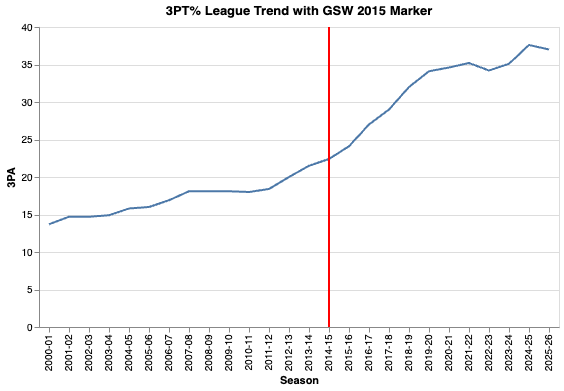

In [43]:
base = alt.Chart(df).mark_line().encode(
    x='Season',
    y='3PA',
)

marker_df = pd.DataFrame({
    'Season': ['2014-15'],
    'event': ["Golden State Warrior's First Championship (Steph Curry's Team)"],
})

marker_line = alt.Chart(marker_df).mark_rule(
    color='red',
    size=2
).encode(
    x='Season:O',
    tooltip=[
        alt.Tooltip('Season:N', title='Season'),
        alt.Tooltip('event:N', title='Event'),
    ]
)

(base + marker_line).properties(
    title="3PT% League Trend with GSW 2015 Marker")

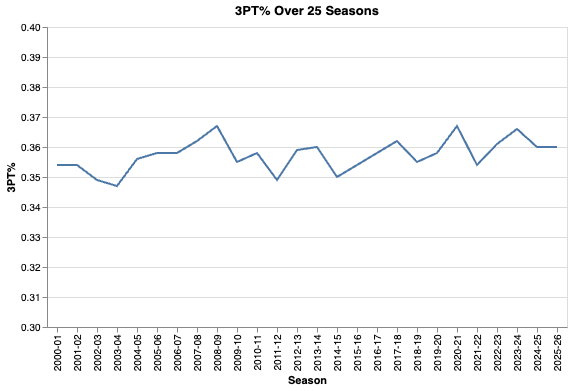

In [44]:
base = alt.Chart(df).mark_line().encode(
    x='Season:O',
    y=alt.Y(
        '3P%',
        title='3PT%',
        scale=alt.Scale(domain=[0.3, 0.4])
)
)

base.properties(
    title="3PT% Over 25 Seasons")


In [45]:
top10_attempts  = pd.read_csv("t10_attempts.csv")
top10_attempts = top10_attempts.rename(columns={top10_attempts.columns[0]: 'Year'})
top10_attempts

for x in range(1,11):
    col = str(x)
    top10_attempts[col] = top10_attempts[col].str.extract(r'\((\d+)\)').astype(int)
top10_attempts

,Year,1,2,3,4,5,6,7,8,9,10
0,2024-25,811,784,766,728,691,670,668,661,642,633
1,2023-24,876,744,705,692,641,622,609,605,597,592
2,2022-23,731,686,677,658,658,639,637,636,635,606
3,2021-22,750,716,654,651,642,637,624,619,610,610
4,2020-21,801,721,704,613,599,571,548,529,520,485
5,2019-20,843,688,674,606,585,568,541,513,512,504
6,2018-19,1028,810,757,731,651,643,635,605,600,599
7,2017-18,722,629,609,608,601,596,579,550,550,532
8,2016-17,789,756,661,647,646,602,583,579,555,552
9,2015-16,886,657,650,610,566,547,525,510,499,490


In [46]:
df_compare = top10_attempts[top10_attempts['Year'].isin(['2024-25','2009-10'])]

df_long = df_compare.melt(
    id_vars='Year',
    value_vars=[str(i) for i in range(1, 10)],
    var_name='Rank',
    value_name='Attempts'
)

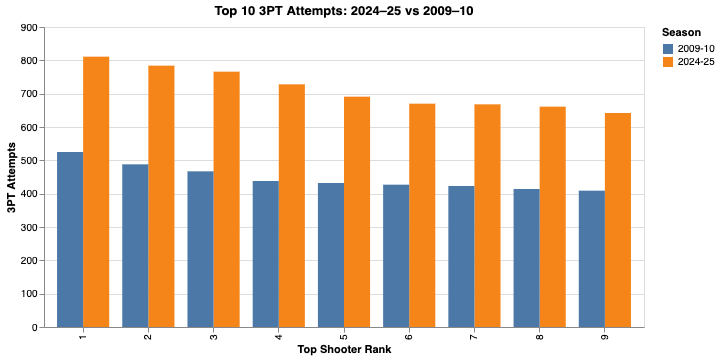

In [47]:
alt.Chart(df_long).mark_bar().encode(
    x=alt.X('Rank:O', title='Top Shooter Rank'),
    xOffset='Year:N',
    y=alt.Y('Attempts:Q', title='3PT Attempts'),
    color=alt.Color('Year:N', title='Season'), 
    tooltip=['Year', 'Rank', 'Attempts']
).properties(
    title='Top 10 3PT Attempts: 2024–25 vs 2009–10',
    width=600
)


In [49]:
allstats_15 = pd.read_csv('2015_allstats.csv')
allstats_15.head()


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
0,1,Stephen Curry,27,GSW,PG,79,79,34.2,10.2,20.2,...,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1,MVP-1ASNBA1,curryst01
1,6,Damian Lillard,25,POR,PG,75,75,35.7,8.2,19.7,...,3.4,4.0,6.8,0.9,0.4,3.2,2.2,25.1,MVP-8NBA2,lillada01
2,12,Klay Thompson,25,GSW,SG,80,80,33.3,8.1,17.3,...,3.4,3.8,2.1,0.8,0.6,1.7,1.9,22.1,ASNBA3,thompkl01
3,2,James Harden,26,HOU,SG,82,82,38.1,8.7,19.7,...,5.3,6.1,7.5,1.7,0.6,4.6,2.8,29.0,MVP-9AS,hardeja01
4,91,Robert Covington,25,PHI,SF,67,49,28.4,4.1,10.6,...,5.3,6.3,1.4,1.6,0.6,2.1,3.5,12.8,NaN,covinro01


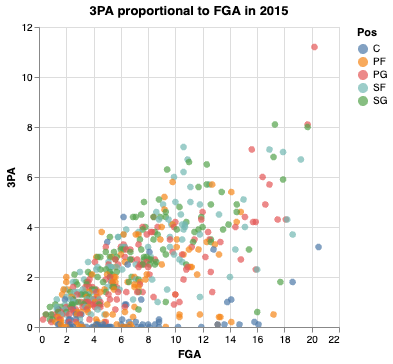

In [50]:
pos_sel = alt.selection_point(
    fields=['Pos'],
    bind='legend'      # <- clicking legend entries toggles selection
)

alt.Chart(allstats_15).mark_circle(size=45).encode(
    x='FGA',
    y='3PA',
    color='Pos',
    tooltip=['Player']
).add_params(pos_sel).transform_filter(pos_sel).interactive().properties(
    title="3PA proportional to FGA in 2015")


In [52]:

allstats_25 = pd.read_csv('2025_allstats.csv')
allstats_25.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Player-additional
0,18,Stephen Curry,36,GSW,PG,70,70,32.2,8.1,18.0,...,3.9,4.4,6.0,1.1,0.4,2.9,1.4,24.5,MVP-9CPOY-5ASNBA2,curryst01
1,13,LaMelo Ball,23,CHO,PG,47,47,32.0,8.6,21.3,...,3.9,4.9,7.4,1.1,0.3,3.6,3.3,25.2,NaN,ballla01
2,44,Brandon Miller,22,CHO,SF,27,27,34.2,7.3,18.2,...,3.9,4.9,3.6,1.1,0.7,2.8,2.7,21.0,NaN,millebr02
3,5,Anthony Edwards,23,MIN,SG,79,79,36.3,9.1,20.4,...,4.9,5.7,4.5,1.2,0.6,3.2,1.9,27.6,MVP-7CPOY-3ASNBA2,edwaran01
4,6,Jayson Tatum,26,BOS,PF,72,72,36.4,9.2,20.3,...,8.0,8.7,6.0,1.1,0.5,2.9,2.2,26.8,MVP-4CPOY-10ASNBA1,tatumja01


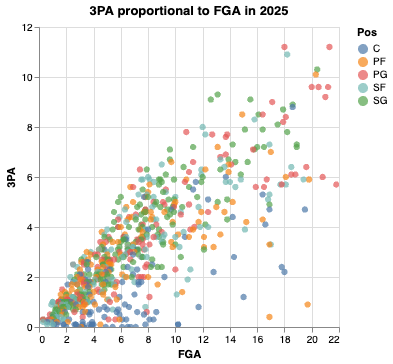

In [53]:
pos_sel = alt.selection_point(
    fields=['Pos'],
    bind='legend'      # <- clicking legend entries toggles selection
)


alt.Chart(allstats_25).mark_circle(size=40).encode(
    x='FGA',
    y='3PA',
    color='Pos',
    tooltip=['Player']
).add_params(pos_sel).transform_filter(pos_sel).interactive().properties(
    title="3PA proportional to FGA in 2025")
